In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [16]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# movies_initial.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/sample_data/imdb-movies.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'movies_initial.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 21 columns


# New section

In [24]:
df1.shape

(1000, 21)

In [25]:
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [26]:
correlation = imdb_movies.corr()
correlation

,imdbID,year,metacritic,imdbRating,imdbVotes
imdbID,1.000000,0.982763,-0.260338,0.008789,0.046232
year,0.982763,1.000000,-0.909785,0.016942,0.051676
metacritic,-0.260338,-0.909785,1.000000,0.875318,0.163624
imdbRating,0.008789,0.016942,0.875318,1.000000,0.257370
imdbVotes,0.046232,0.051676,0.163624,0.257370,1.000000


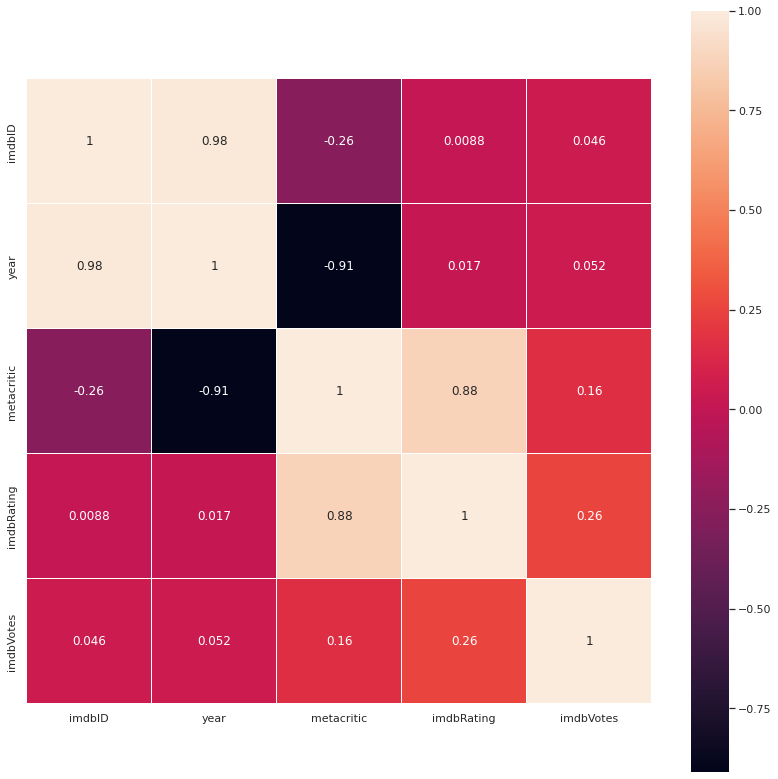

In [27]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation,annot=True,linewidths=0.01,vmax=1,square=True,cbar=True);
?sns.heatmap

**Understanding**

---



It Defines the correlation between parameters. By analysing this graph we can clearly understand that the profit and popularity, Votecount and popularity, revene and votecount,votecount and profit are highly dependable. id field doesnt have any role in the dataset.

**Drawing bar graph based on top 10 years of most number of movies releases.**

---






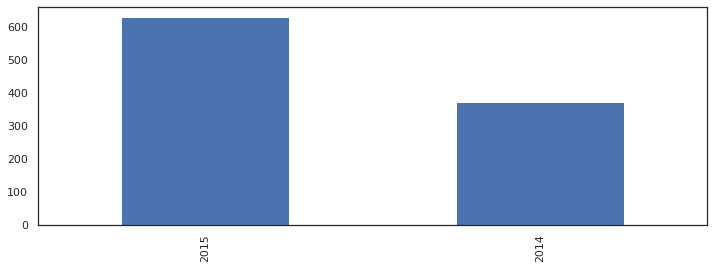

In [30]:
#X axis defines the year and Y axis defines its count.
df1['release_year'].value_counts().head(10).plot.bar(figsize=(12,4))

**Relationship between vote_rating and budget(using last 12 records)**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


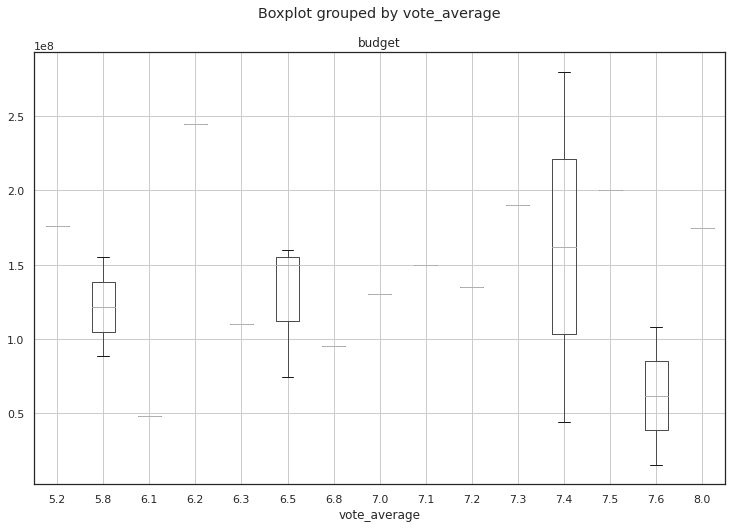

In [32]:
# visualize the relationship between vote_rating and budget(using last 12 records)
df1.head(20).boxplot(column='budget', by='vote_average',figsize=(12,8))

**Visualize the relationship between revenue and budget(using last 12 records)**

---



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


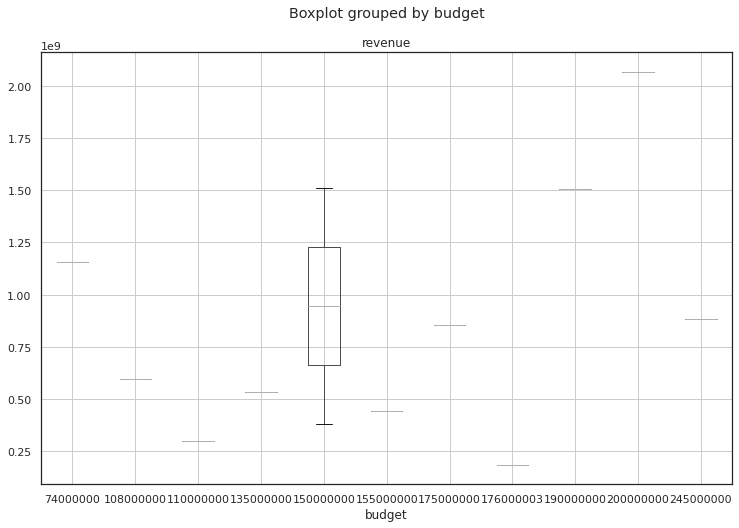

In [33]:
df1.head(12).boxplot(column='revenue',by='budget',figsize=(12,8))

In [34]:
#adding new column and showing the profit details
df1['profit']=df1.revenue-df1.budget

**Top 10 Highest profit movies**

---



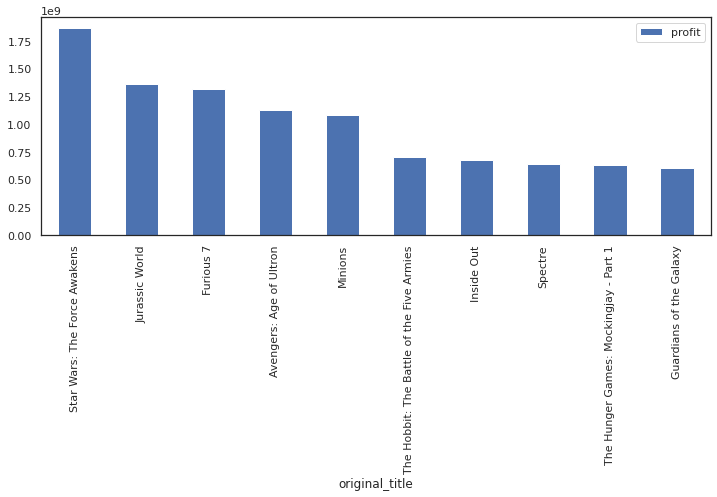

In [36]:
top10 = df1.nlargest(10,'profit')
top10.index = top10.original_title
top10[['original_title','profit']].plot.bar(figsize=(12,4))

**Diectors with most number of movies.**

---



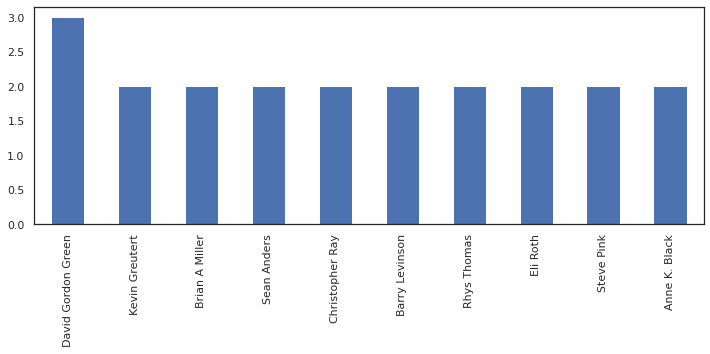

In [37]:
df1.director.value_counts().head(10).plot.bar(figsize=(12,4))

**Popularity Vs Budget**

---



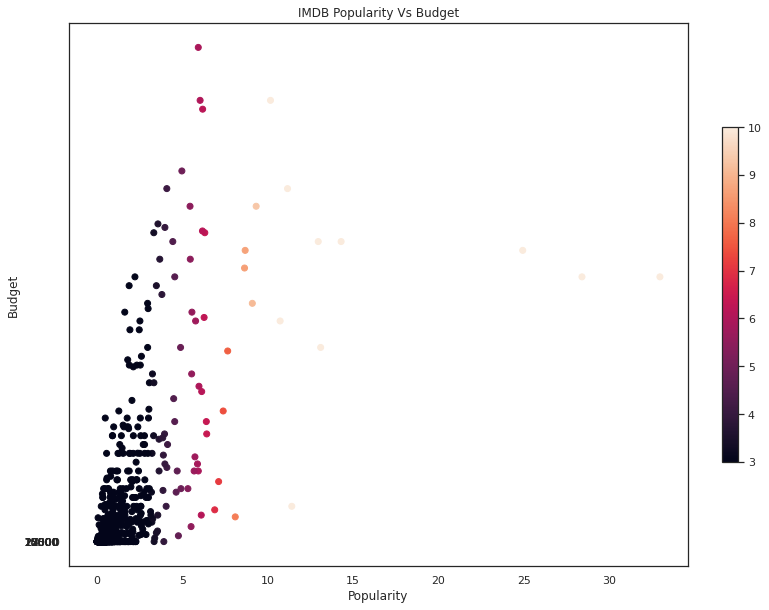

In [39]:
plt.figure(figsize=(12,10))
plt.title("IMDB Popularity Vs Budget")
plt.xlabel("Popularity")
plt.ylabel("Budget")
tmp=plt.scatter(df1.popularity,df1.budget,c=df1.popularity,vmin=3,vmax=10)
plt.yticks([i*2500 for i in range(11)])
plt.colorbar(tmp,fraction=.025)
plt.show()

In [41]:
top20ProfitMovies = df1.nlargest(20,'profit')

**Profit VS Average Voting**

Below graph clearly defines the correlation between the profit and Average user voting.

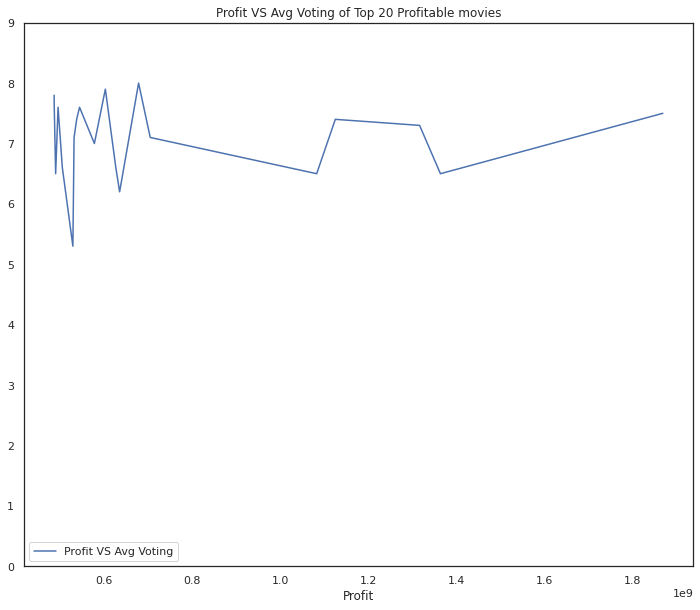

In [42]:
plt.figure(figsize=(12,10))
plt.title("Profit VS Avg Voting of Top 20 Profitable movies")
plt.xlabel('Profit')
plt.plot(top20ProfitMovies.profit,top20ProfitMovies.vote_average)
plt.legend(['Profit VS Avg Voting'],loc='lower left')
plt.yticks(range(10))
plt.show()

**No of Movie released in each Genres**

---



In [43]:
arrayGenres = []
for i in df1.genres:
    if type(i) == str:
        for x in i.split('|'):
            arrayGenres.append(x)

In [44]:
from collections import Counter
dicGenresWithCounts = Counter(arrayGenres)

Text(0, 0.5, 'No of movies released')

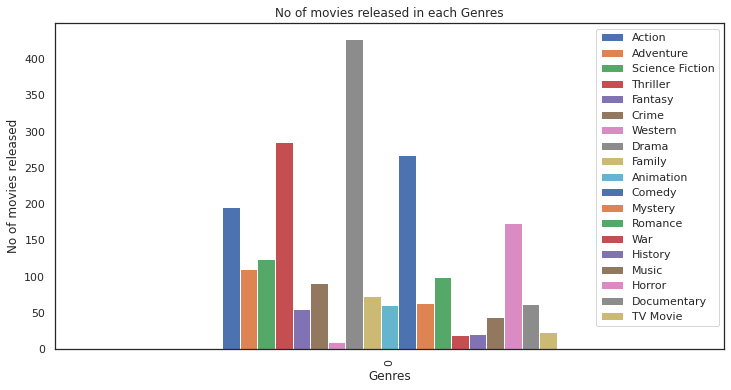

In [45]:
df=pd.DataFrame.from_dict([dicGenresWithCounts.values()])
df.columns=list(dicGenresWithCounts.keys())
df.plot.bar(figsize=(12,6))
plt.title("No of movies released in each Genres")
plt.xlabel("Genres")
plt.ylabel("No of movies released")

**Top 10 Directors**

---



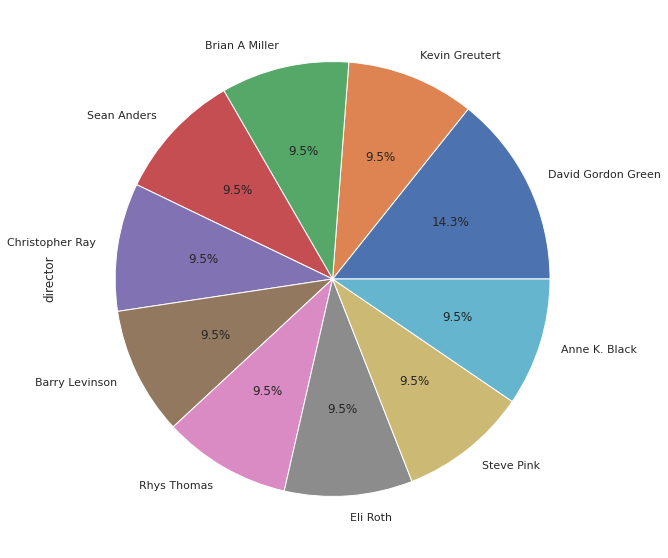

In [46]:
df1.director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))

**Top 10 Actor/Actress**

---



Text(0, 0.5, 'No of movies released')

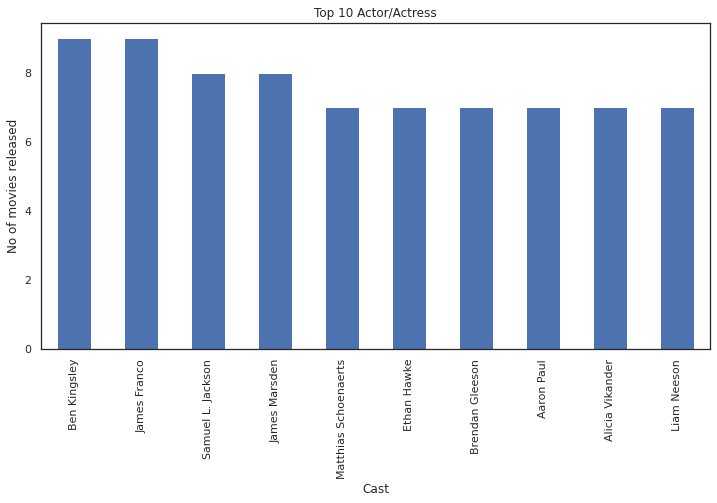

In [48]:
arrayCast = []
for i in df1.cast:
    if type(i) == str:
        for x in i.split('|'):
            arrayCast.append(x)
dicCastWithCounts = Counter(arrayCast)
df_Cast=pd.DataFrame(data={'Cast':list(dicCastWithCounts.keys()),'Count':list(dicCastWithCounts.values())}).sort_values(by='Count',ascending=False)
df_Cast.index = df_Cast.Cast
df_Cast.Count.head(10).plot.bar(figsize=(12,6))
plt.title("Top 10 Actor/Actress")
plt.xlabel("Cast")
plt.ylabel("No of movies released")

**Top 10 Acter/Actress analysis graph**

---



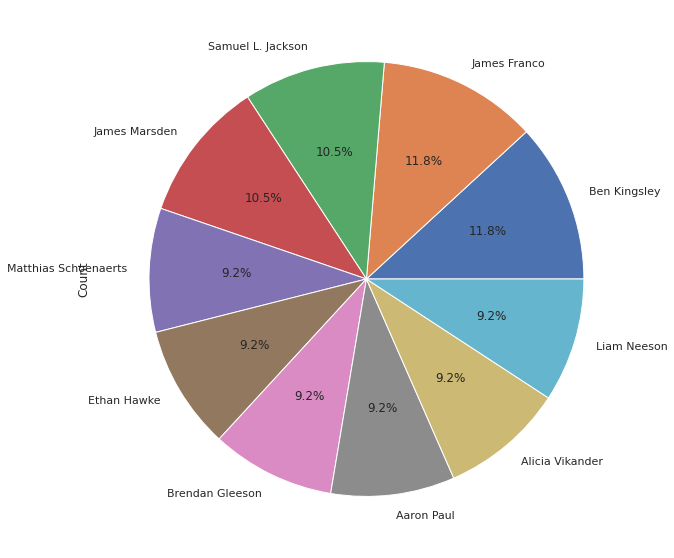

In [49]:
df_Cast.Count.head(10).plot.pie(autopct='%1.1f%%',figsize=(10,10))

**IMDB movie data classification**

Add new column and named it as 'IsProfitable',

Lets assume profit is less than 200% of budget is considered as non profitable and classify the whole dataset.

In [50]:
df1['IsProfitable'] = df1.profit>(df1.budget*2)

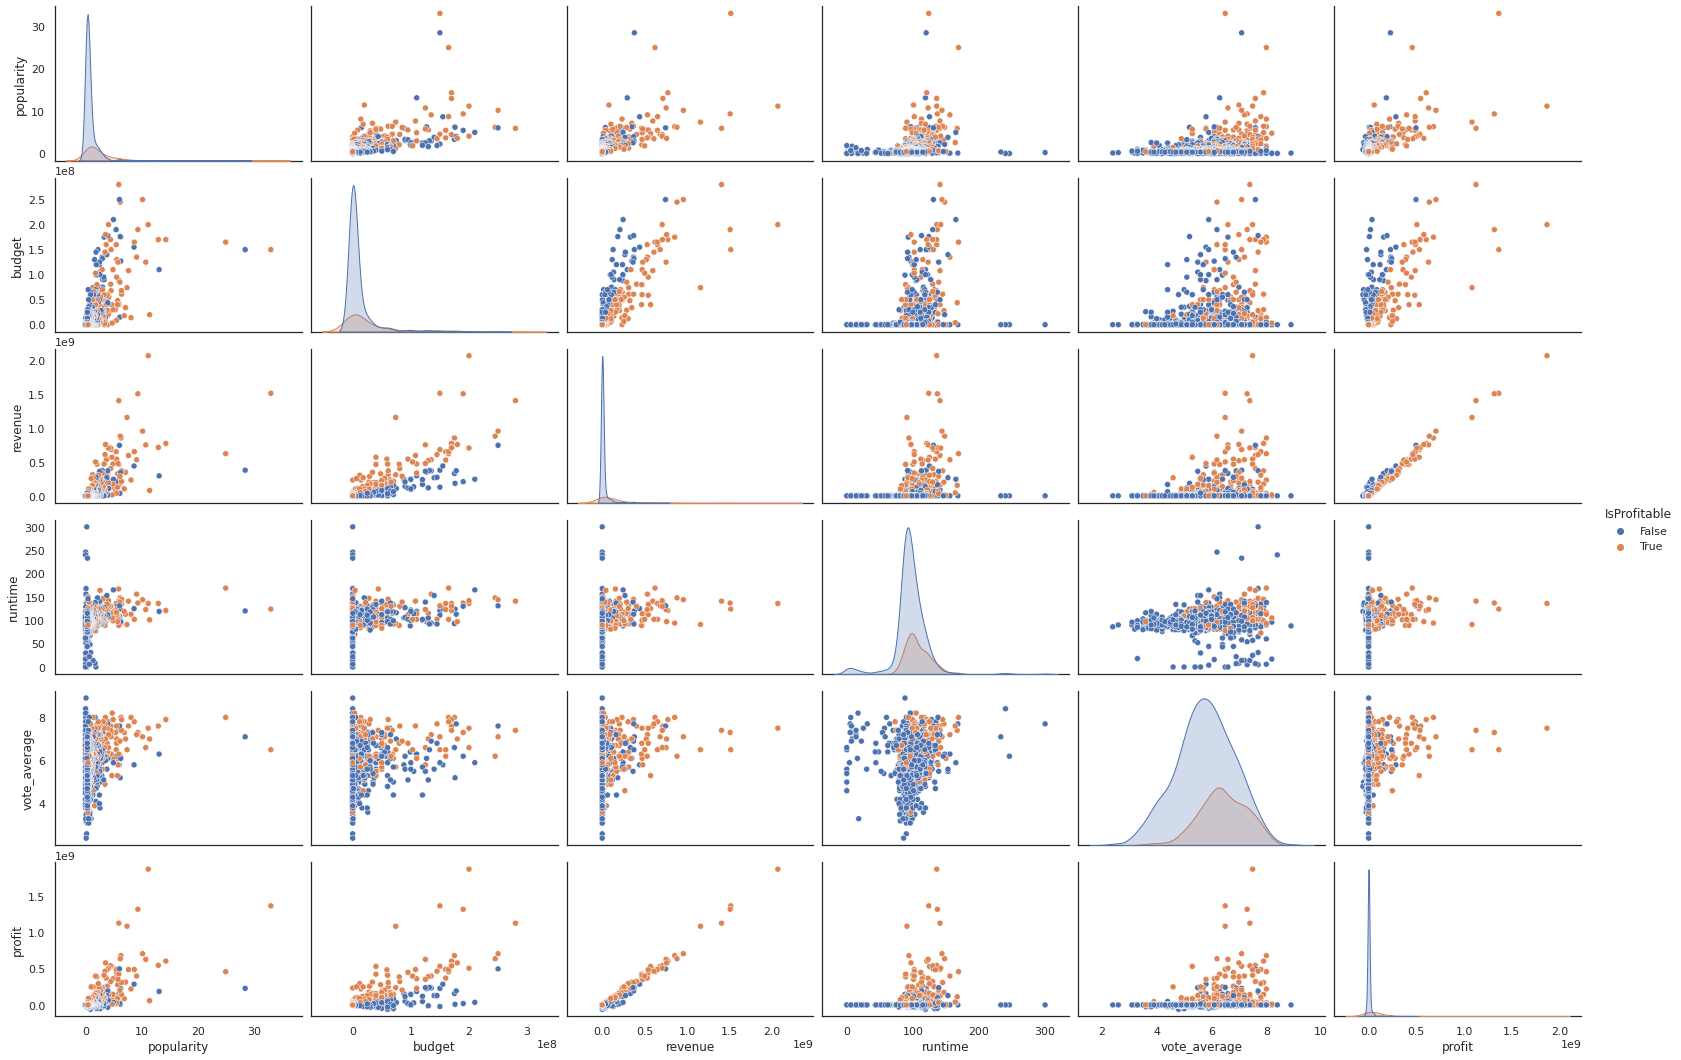

In [51]:
df_imp_data = df1.drop(['id','imdb_id','homepage', 'tagline','cast','keywords','overview','genres','production_companies','release_date','budget_adj','revenue_adj','release_year','original_title','vote_count','director'], axis=1)
df_imp_data
sns.pairplot(df_imp_data, hue='IsProfitable', aspect=1.5)
plt.show()

**Conclusion.**

---
Hence,the movie analysis has been successfully analysed.

